1317833 annotations
77601 annotations with PMID reference: 
15849 annotations with unique PMID reference
1238971 annotations with GO reference
8 annotations with unique GO reference
Most Common PMIDS and frequency
[('10952301', 3601), ('12368867', 2189), ('12721629', 1691), ('15525680', 1339), ('18405346', 1152)]


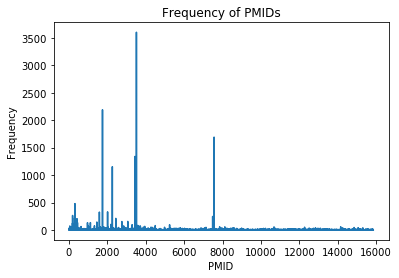

# PMID occuring uniquely (once):  5126


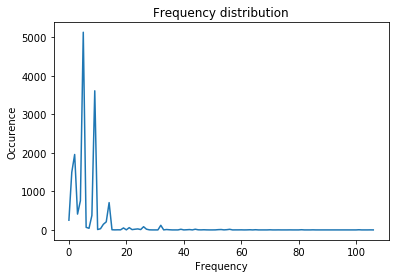

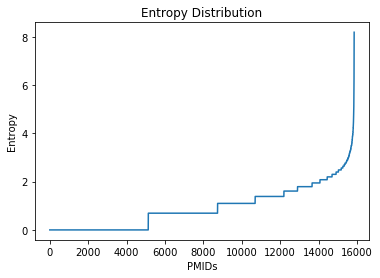

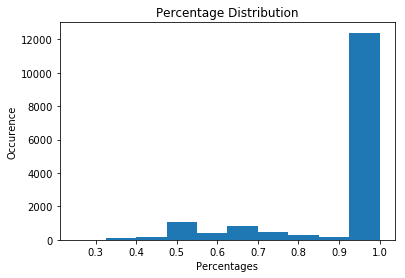

In [2]:
import pickle as pkl
from matplotlib import pyplot as plt
from collections import Counter
import numpy as np

with open('../data/annotations.pkl','rb') as f:
    records=pkl.load(f)
    
print('1317833 annotations')
print('77601 annotations with PMID reference: ')
print('15849 annotations with unique PMID reference')
print('1238971 annotations with GO reference')
print('8 annotations with unique GO reference')

#getting the data
pmid_ref=[]
pmid_reflist={}
codes=set()
for each in records:
    journal,i=each[5].split(':',1)
    code=each[6]
    codes.add(code)
    if 'PMID' in journal:
        pmid_ref.append(i)
        if i in pmid_reflist:
            pmid_reflist[i].append(code)
        else:
            pmid_reflist[i]=[code]
            
#Counting repeats of the references
cnt=Counter(pmid_ref)
counts=list(cnt.values())
print ('Most Common PMIDS and frequency')
print(cnt.most_common(5))
plt.title('Frequency of PMIDs')
plt.xlabel('PMID')
plt.ylabel('Frequency')
plt.plot(counts)
plt.show()

#How many references occur x times?
cnt2=Counter(counts)
print ('# PMID occuring uniquely (once): ',cnt2[1])
plt.title('Frequency distribution')
plt.xlabel('Frequency')
plt.ylabel('Occurence')
plt.plot(list(cnt2.values()))
plt.show()


#Calculating entropy of the evidence codes per reference
total=len(codes)
entropy={}
for k,v in pmid_reflist.items():
    sums=0
    for each in v:
        val,count=np.unique(each,return_counts=True)
        p=count/len(v)
        sums+=p*np.log(p)
    entropy[k]=-sums

ent=list(entropy.values())
ent=sorted(ent)
plt.title('Entropy Distribution')
plt.xlabel('PMIDs')
plt.ylabel('Entropy')
plt.plot(ent)
plt.show()

#Calculating percentage of the majority evidence code per reference
perc_dist={}
for k,v in pmid_reflist.items():
    cnt3=Counter(v)
    perc=cnt3.most_common(1)[0][1]/len(v)
    perc_dist[k]=perc
plt.title('Percentage Distribution')
plt.xlabel('Percentages')
plt.ylabel('Occurence')
plt.hist(list(perc_dist.values()))
plt.show()